<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [ ]:
# IMPORTO EL SET DE DATO
# ==============================================================================
 # OPCION 2
from sklearn.datasets import load_diabetes
data = load_diabetes()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
data['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [ ]:
datos =  data

# CORRELACION ENTRE COLUMNAS

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
61,s1,s2,0.896663,0.896663
71,s2,s1,0.896663,0.896663
85,s3,s4,-0.738493,0.738493
95,s4,s3,-0.738493,0.738493
94,s4,s2,0.659817,0.659817
74,s2,s4,0.659817,0.659817
107,s5,s4,0.617857,0.617857
97,s4,s5,0.617857,0.617857
3,target,bmi,0.586450,0.586450
33,bmi,target,0.586450,0.586450


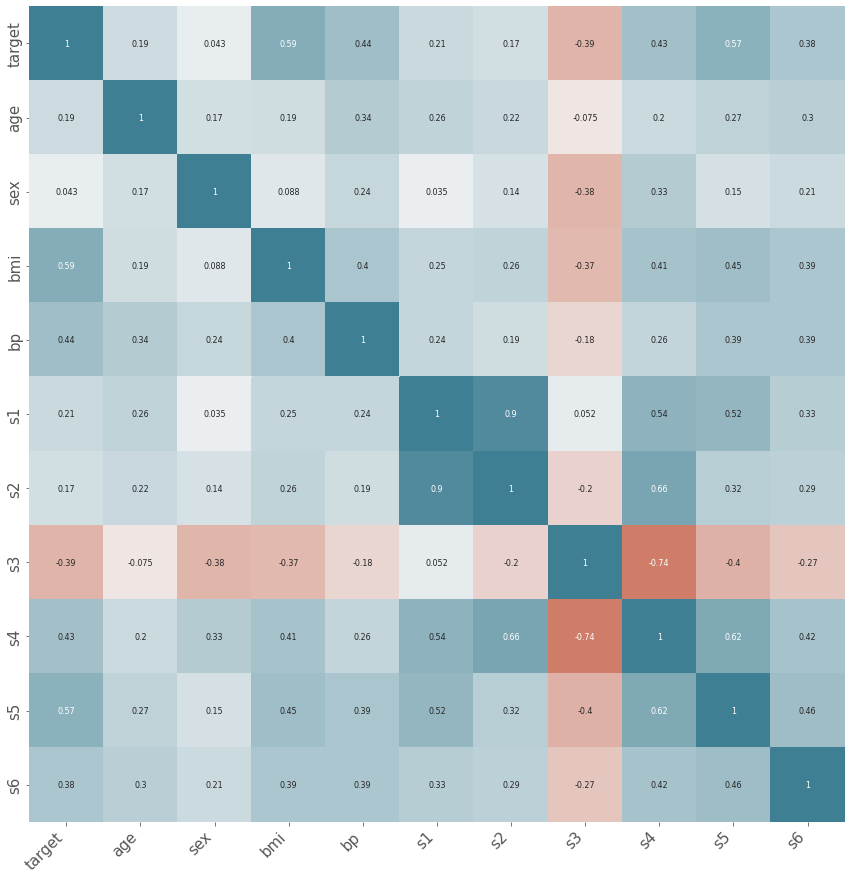

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

IndexError: ignored

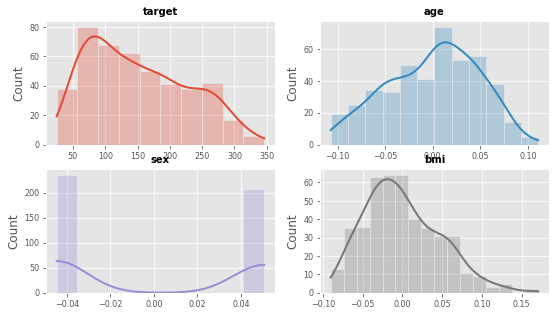

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

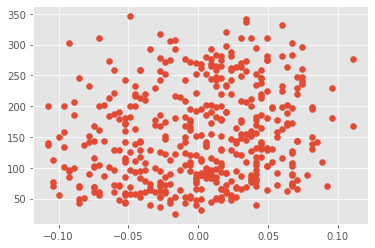

In [ ]:
plt.scatter(datos['age'],datos['target'])

# FUNCION DE DIAGNOSTICOS DE RESIDUOS GRAFICOS

In [ ]:
# FUNCIION DE DIAGNOSTICOS DE RESIDUOS GRAFICOS
def diagnostic_garbages(y_train, prediccion_train,residuos_train ):
  ''' 
  Se reciben los siguientes parametros
  y_train = vector de salida de entrenamiento
  prediccion_train =  resultado de diagnostico de errores
  residuos_train = resultado de diagnostico de errores
  '''
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

  axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                  'k--', color = 'black', lw=2)
  axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
  axes[0, 0].set_xlabel('Real')
  axes[0, 0].set_ylabel('Predicción')
  axes[0, 0].tick_params(labelsize = 7)

  axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[0, 1].set_xlabel('id')
  axes[0, 1].set_ylabel('Residuo')
  axes[0, 1].tick_params(labelsize = 7)

  sns.histplot(
      data    = residuos_train,
      stat    = "density",
      kde     = True,
      line_kws= {'linewidth': 1},
      color   = "firebrick",
      alpha   = 0.3,
      ax      = axes[1, 0]
  )

  axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                      fontweight = "bold")
  axes[1, 0].set_xlabel("Residuo")
  axes[1, 0].tick_params(labelsize = 7)


  sm.qqplot(
      residuos_train,
      fit   = True,
      line  = 'q',
      ax    = axes[1, 1], 
      color = 'firebrick',
      alpha = 0.4,
      lw    = 2
  )
  axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[1, 1].tick_params(labelsize = 7)

  axes[2, 0].scatter(prediccion_train, residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
  axes[2, 0].set_xlabel('Predicción')
  axes[2, 0].set_ylabel('Residuo')
  axes[2, 0].tick_params(labelsize = 7)

  # Se eliminan los axes vacíos
  fig.delaxes(axes[2,1])

  fig.tight_layout()
  plt.subplots_adjust(top=0.9)
  fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


# CONTINUAMOS CON
*   DIVISION DE LOS DATOS EN TRAIN & TEST
*   CREAR MODELO
*   ENTRENAMIENTO
*   INTERVALOS DE CONFIANZA (para los coeficientes del modelo)
*   DIAGNOSTICO DE ERRORES

Entreno 3 modelos mas, donde el set de datos esta modificado
1. Entreno el modelo si realizar cambios 
2. Todas las columnas mas alejadas de 0 se eliminan como predictores.
3. Elimino solo algunas columnas.

Se mostraran los valores de los modelos para poder analizar entre si.

Los residuos **no parecen distribuirse de forma aleatoria en torno a cero**, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón **apunta a una falta** de **homocedasticidad** y de **distribución normal**



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     29.63
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.78e-39
Time:                        19:22:45   Log-Likelihood:                -1602.4
No. Observations:                 296   AIC:                             3227.
Df Residuals:                     285   BIC:                             3267.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.4340      3.223     46.679      0.0

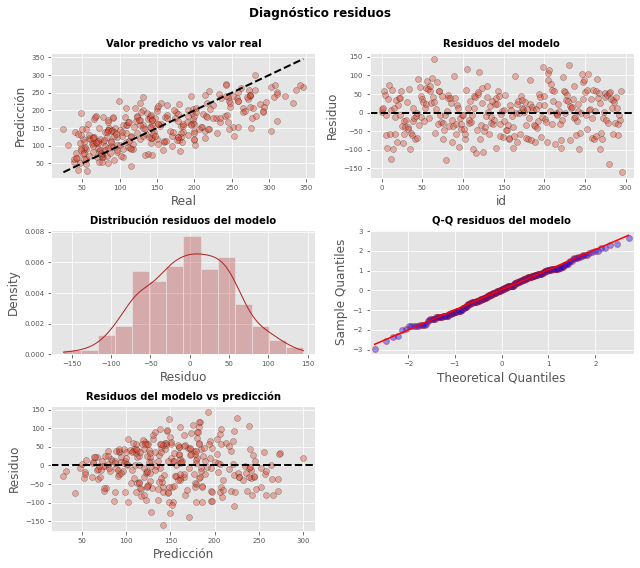

In [ ]:
# División de los datos en train y test
# ==============================================================================
#PONER CODIGO AQUI
# SEPARO ENTRE VARIABLES PREDICTORAS Y TARGET
X = datos.drop(columns = 'target')
y = datos['target']

# DIVISION ENTRE: TRAIN Y TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

# CREAR MODELO Y ENTRENAMIENTO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print(intervalos_ci)

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)


El modelo con todas las variables introducidas como predictores tiene un  R2 de (0.527), es capaz de explicar el 52.7% de la variabilidad observada en las ventas. 

¿¿¿¿¿¿¿El p-value ( Prob (F-statistic)) del modelo es significativo (7.15e-50) por lo que se puede aceptar que el modelo es mejor que lo esperado por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.??????

Acorde al p-value obtenido para el coeficiente parcial de regresión de age, s1, s2, s3, s4, s6 esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo dichos predictores.

**REVISAR**
indicadores


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     64.95
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.34e-39
Time:                        19:22:57   Log-Likelihood:                -1613.5
No. Observations:                 296   AIC:                             3237.
Df Residuals:                     291   BIC:                             3255.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.0104      3.307     45.357      0.0

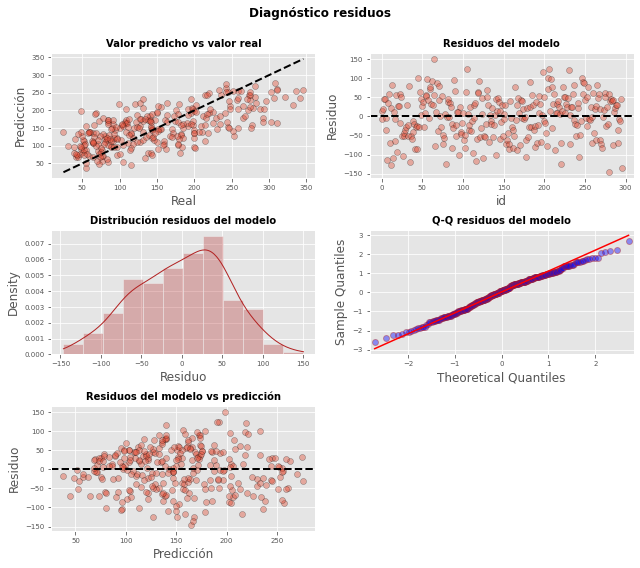

In [ ]:
# EVALUANDO QUITANDO LAS COLUMNAS DE MENOR PESO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train_2 = X_train.drop(columns=['age','s1','s2','s3','s4','s6'])
X_test_2 = X_test.drop(columns=['age','s1','s2','s3','s4','s6'])
X_train_2 = sm.add_constant(X_train_2, prepend=True)
modelo_clear_1 = sm.OLS(endog=y_train, exog=X_train_2,)
modelo_clear_1 = modelo_clear_1.fit()
print(modelo_clear_1.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo_clear_1.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print("\n" + "INTERVALO DE CONFIANZA" +"\n")
print(intervalos_ci)
print("\n" + "######################" +"\n")

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo_clear_1.predict(exog = X_train_2)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     42.71
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           4.28e-41
Time:                        19:23:08   Log-Likelihood:                -1602.5
No. Observations:                 296   AIC:                             3221.
Df Residuals:                     288   BIC:                             3251.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.4303      3.205     46.931      0.0

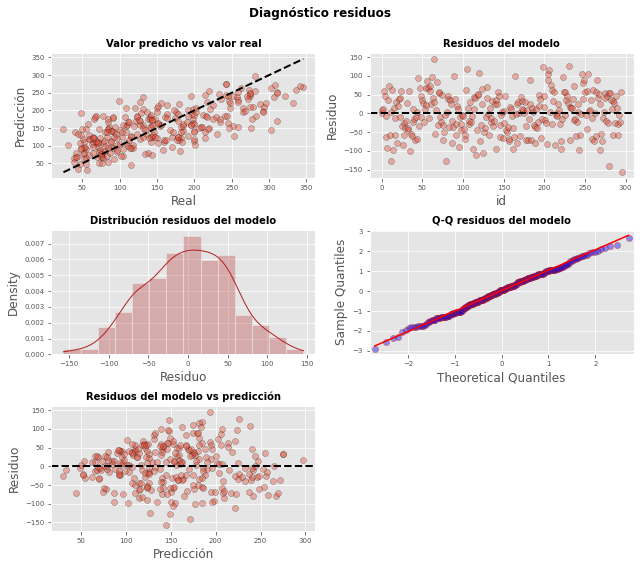

In [ ]:
# EVALUANDO QUITANDO LAS COLUMNAS DE MENOR PESO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train_3 = X_train.drop(columns=['age','s3','s6'])
X_test_3 = X_test.drop(columns=['age','s3','s6'])
X_train_3 = sm.add_constant(X_train_3, prepend=True)
modelo_clear_2 = sm.OLS(endog=y_train, exog=X_train_3,)
modelo_clear_2 = modelo_clear_2.fit()
print(modelo_clear_2.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo_clear_2.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print("\n" + "INTERVALO DE CONFIANZA" +"\n")
print(intervalos_ci)
print("\n" + "######################" +"\n")

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo_clear_2.predict(exog = X_train_3)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)


# Test de normalidad


Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, **la hipótesis nula considera que los datos siguen una distribución normal**, por lo tanto, **si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.**

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9959864020347595, pvalue=0.6536272168159485)

In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1.5856763925928279, p-value = 0.4525585208783136


# Predicciones
Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [ ]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
print(predicciones.head(4))

# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones2 = modelo_clear_1.get_prediction(exog = X_train_2).summary_frame(alpha=0.05)
print(predicciones2.head(4))

# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones3 = modelo_clear_2.get_prediction(exog = X_train_3).summary_frame(alpha=0.05)
print(predicciones3.head(4))

           mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
231  156.054780   6.782908     142.703829     169.405730     46.302020   
325  200.678440  11.433735     178.173161     223.183718     89.440371   
193  128.534379   9.739405     109.364089     147.704669     17.922805   
109  138.532391  11.371978     116.148670     160.916112     27.318852   

     obs_ci_upper  
231    265.807539  
325    311.916508  
193    239.145953  
109    249.745930  
           mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
231  147.281187   6.020045     135.432839     159.129536     34.749323   
325  204.878359  10.671083     183.876072     225.880645     91.018212   
193  134.611785   8.276690     118.322022     150.901549     21.526007   
109  126.676176   5.366029     116.115028     137.237324     14.272551   

     obs_ci_upper  
231    259.813051  
325    318.738505  
193    247.697564  
109    239.079800  
           mean    mean_se  mean_ci_lower  mean_ci_upper  

# Error Test

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

# Error de test del modelo 2
# ==============================================================================
X_test_2 = sm.add_constant(X_test_2, prepend=True)
predicciones2 = modelo_clear_1.predict(exog = X_test_2)
rmse2 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones2,
        squared = False
       )
print("")
print(f"El error (rmse2) de test es: {rmse2}")

# Error de test del modelo 3
# ==============================================================================
X_test_3 = sm.add_constant(X_test_3, prepend=True)
predicciones3 = modelo_clear_2.predict(exog = X_test_3)
rmse3 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones3,
        squared = False
       )
print("")
print(f"El error (rmse3) de test es: {rmse3}")


El error (rmse) de test es: 53.08296873921688

El error (rmse2) de test es: 53.549599478157994

El error (rmse3) de test es: 52.826921376950025


# Interpretación
##Conclusión Regresion lineal multiple

- Modelo

R-squared: 0.510

El error (rmse) de test es: 53.08


- Modelo_Clear_1

R-squared: 0.510

El error (rmse) de test es: 53.55


- Modelo_Clear_2

R-squared:   0.465

El error (rmse) de test es: 53.99

Por lo observado y analizado vemos que el modelo de Regresion lineal multiple no es capaz de arrojar buenos resultados.

Aun asi las mejores metricas se obtienen con el primer entrenamiento del modelo, el cual trabaja con todas las variables introducidas como predictores. Este tiene un  R2 de (0.510), lo que indica que es capaz de explicar el 51% de la variabilidad observada y su error (rmse) de test es del 53.08, el menor de los tres obtenidos. 

A medida que eliminamos columnas predictoras los entrenamientos empeoran en sus metricas.

# Comparación de modelos mediante test F-test (ANOVA)

Supóngase un modelo  M  y otro modelo  m , de menor tamaño, formado por un subconjunto de los predictores contenidos en  M . Si la diferencia en el ajuste es muy pequeña, acorde al principio de parsimonia, el modelo  m  es más adecuado. Es posible contrastar si la diferencia en ajuste es significativa mediante la comparación de los residuos. En concreto el estadístico empleado es:

# $ \frac {RSS_m - RSS_M}{RSS_M} $
 
Para evitar que el tamaño del modelo influya en el contraste, se divide la suma de residuos cuadrados RSS de cada modelo entre sus grados de libertad. El estadístico resultante sigue una distribución  F .

#  $ \frac{(RSS_m - RSS_M)/(df_m - df_M)}{RSS_M/(df_M)} \sim F_{df_m-df_M, \ df_M} $
 
donde  df  son los grados de libertad del modelo, que equivalen al número de observaciones menos el número de predictores.

En los apartados anteriores, se entrenó un modelo que incluía interacciones y otro que no. Se procede a realizar un test de hipótesis que evalúe la hipótesis nula de que ambos modelos se ajustan a los datos igual de bien. Es decir, que permita determinar si un modelo es mejor que el otro prediciendo la variable respuesta. Esto puede hacerse con la función anova_lm() de statsmodels.stats.anova.


In [ ]:
anova_lm(modelo, modelo_clear_1,modelo_clear_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,285.0,872988.704654,0.0,NaN,NaN,NaN
1,291.0,940776.496871,-6.0,-67787.792218,3.724253,NaN
2,288.0,873682.214052,3.0,67094.282819,7.372304,0.000089


El test ANOVA encuentra evidencias claras (p-value prácticamente de cero) de que el modelo que incluye la interacción entre predictores es capaz de modelar mejor la variable respuesta.

Esta forma de comparar modelos está muy arraigada en la comunidad estadística. En la comunidad de machine learning es mucho más común comparar modelos con técnicas de validación como la validación cruzada.

# MODELO DE DESISION TREE REGRESSION 
Utilizaremos un modelo arbol de desicion de regresiony evaluaremos si este modelo se adapta mejor al set de datos.

In [ ]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

### CARGA DE DATOS

In [ ]:
# Datos
# ==============================================================================
 # OPCION 2
from sklearn.datasets import load_diabetes
data = load_diabetes()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
data['target'].unique()

datos_DT = data

In [ ]:
datos_DT.head(3)

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  442 non-null    float64
 1   age     442 non-null    float64
 2   sex     442 non-null    float64
 3   bmi     442 non-null    float64
 4   bp      442 non-null    float64
 5   s1      442 non-null    float64
 6   s2      442 non-null    float64
 7   s3      442 non-null    float64
 8   s4      442 non-null    float64
 9   s5      442 non-null    float64
 10  s6      442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
# SEPARO ENTRE VARIABLES PREDICTORAS Y TARGET
X = datos_DT.drop(columns = 'target')
y = datos_DT['target']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123
                                    )


## PARAMETROS DEL MODELO desision_tree_regression

La clase DecisionTreeRegressor del módulo sklearn.tree permite entrenar árboles de decisión para problemas de regresión. A continuación, se ajusta un árbol de regresión empleando como variable respuesta **TARGET** y como predictores todas las otras variables disponibles.

DecisionTreeRegressor tiene por defecto los siguientes hiperparámetros:

- **criterion** = 'mse'
- **splitter** = 'best'
- **max_depth** = None
- **min_samples_split** = 2
- **min_samples_leaf** = 1
- **min_weight_fraction_leaf** = 0.0
- **max_features** = None
- **random_state** = None
- **max_leaf_nodes** = None
- **min_impurity_decrease** = 0.0
- **min_impurity_split** = None
- **ccp_alpha** = 0.0

De entre todos ellos, los más importantes son aquellos que detienen el crecimiento del árbol (condiciones de stop):

**max_depth**: profundidad máxima que puede alcanzar el árbol.

**min_samples_split**: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

**min_samples_leaf**: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

**max_leaf_nodes**: número máximo de nodos terminales.

**random_state**: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.


**Como en todo estudio de regresión, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. }
Para poder hacer la posterior evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.**

## Busqueda en gruilla de parametros 
Antes de crear nuestro modelo, evaluamos los parametrso que mejor se adapten.
Esto lo hacemos con una busqueda en grilla.

In [ ]:
#Generamos los parametros para hacer una busqueda en grilla del mejor modelo
# modelo y parametros = https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor

model_params = {
    'desision_tree_regression':{
        'model':DecisionTreeRegressor(),
        'params':{
            'splitter':['best','random'],
            'max_depth':[3,7,11], #profundidad maxima del arbol
            'min_samples_split':[5, 10],  #numero minimo de muestras requeridas para dividir un nodo interno
            'min_samples_leaf':[5, 10],   #numero minimo de muestras requeridas para estar en un nodo hoja
            'random_state': [5,10,123],
            'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
        }
    }
}

In [ ]:
#Hacemos la busqueda en grilla
score = []

for model_name, mp in model_params.items():

  clf=GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
  clf.fit(X_train, y_train)
  
  score.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [ ]:
score

[{'model': 'desision_tree_regression',
  'best_score': 0.3843250778985106,
  'best_params': {'criterion': 'squared_error',
   'max_depth': 3,
   'min_samples_leaf': 10,
   'min_samples_split': 5,
   'random_state': 123,
   'splitter': 'random'}}]

In [ ]:
#Vemos cuales fueron los mejores resultados de cada modelo y seleccionamos el mejor
df_score = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
df_score

,model,best_score,best_params
0,desision_tree_regression,0.384325,"{'criterion': 'squared_error', 'max_depth': 3,..."


### CREACION Y ENTRENAMIENTO DE LOS MODELOS

In [ ]:
# Creación del modelos
# ------------------------------------------------------------------------------

# MODELO BASICO
modelo_tutorial = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# MODELO CON PARAMETROS DE GRILLA
modelo_param1 = DecisionTreeRegressor(
            criterion = 'squared_error',
            max_depth         = 3,
            min_samples_leaf = 10,
            min_samples_split = 5,
            splitter          = 'random',
            random_state      = 123
          )


# Entrenamiento de los modelos
# ------------------------------------------------------------------------------
modelo_tutorial.fit(X_train, y_train)
modelo_param1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=5,
                      random_state=123, splitter='random')

### PLOT ARBOL MODELOS

 MODELO TUTORIAL 
Profundidad del árbol: 3
Número de nodos terminales: 8
 MODELO PARAM1 
Profundidad del árbol: 3
Número de nodos terminales: 6


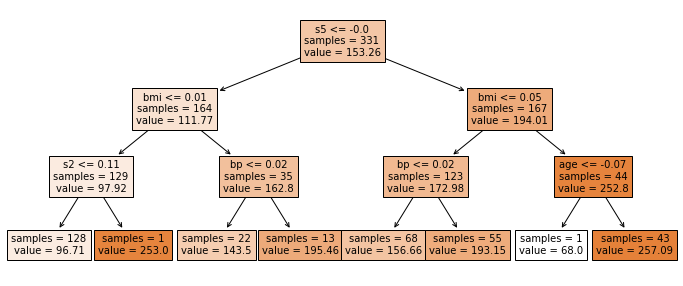

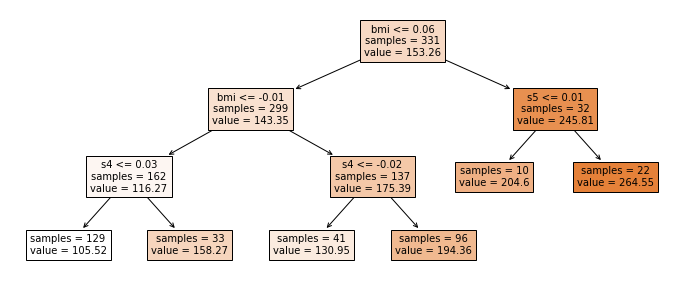

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
print(" MODELO TUTORIAL ")
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_tutorial.get_depth()}")
print(f"Número de nodos terminales: {modelo_tutorial.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_tutorial,
            feature_names = X.columns,
            class_names   = 'TARGET',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )
# Estructura del árbol creado
# ------------------------------------------------------------------------------
print(" MODELO PARAM1 ")
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo_param1.get_depth()}")
print(f"Número de nodos terminales: {modelo_param1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_param1,
            feature_names = X.columns,
            class_names   = 'TARGET',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### IMPORTANCIA DE PREDICTORES (pesos de variables)
La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el **squared_error**, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [ ]:
print( "MODELO TUROTIAL")
importancia_predictores_tuto = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_tutorial.feature_importances_}
                            )
print("Importancia de los predictores en el modelo_tutorial")
print("-------------------------------------------")
print(importancia_predictores_tuto.sort_values('importancia', ascending=False))

print( "MODELO PARAM1")
importancia_predictores_param = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_param1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo_param")
print("-------------------------------------------")
importancia_predictores_param.sort_values('importancia', ascending=False)

MODELO TUROTIAL
Importancia de los predictores en el modelo_tutorial
-------------------------------------------
  predictor  importancia
8        s5     0.557553
2       bmi     0.321175
3        bp     0.062308
0       age     0.034816
5        s2     0.024148
1       sex     0.000000
4        s1     0.000000
6        s3     0.000000
7        s4     0.000000
9        s6     0.000000
MODELO PARAM1
Importancia de los predictores en el modelo_param
-------------------------------------------


,predictor,importancia
2,bmi,0.725139
7,s4,0.243035
8,s5,0.031826
0,age,0.000000
1,sex,0.000000
3,bp,0.000000
4,s1,0.000000
5,s2,0.000000
6,s3,0.000000
9,s6,0.000000


Analisis:
Para los modelos los predictores de pesos difieren.
En el caso del modelo tuto
El predictor **S5**, una muestra de sangre, ha resultado ser el predictor más importante en el modelo, seguido de **bmi** indice de masa corporal.

### PODA DE LOS ARBOLES
El objetivo de la poda es generalizar y evitar el overfiting

Con la finalidad de reducir la varianza del modelo y así mejorar la capacidad predictiva, se somete al árbol a un proceso de pruning. Tal como se describió con anterioridad, el proceso de pruning intenta encontrar el árbol más sencillo (menor tamaño) que consigue los mejores resultados de predicción.

Para aplicar el proceso de pruning es necesario indicar el argumento ccp_alpha que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante. Dado que no hay forma de conocer de antemano el valor óptimo de ccp_alpha, se recurre a validación cruzada para identificarlo.

Aunque existen otras formas de indentificar árboles "optimos", por ejemplo identificando el valor de max_depth y min_samples_split mediante validación cruzada, el pruning puede generar mejores resultados ya que permite que una división poco útil se mantenga si las siguientes divisiones que parten de ella sí lo son.

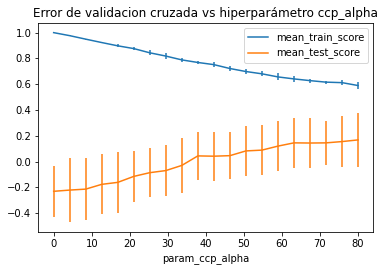

In [ ]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [ ]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 80.0}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en .best_estimator_.

Profundidad del árbol: 6
Número de nodos terminales: 11


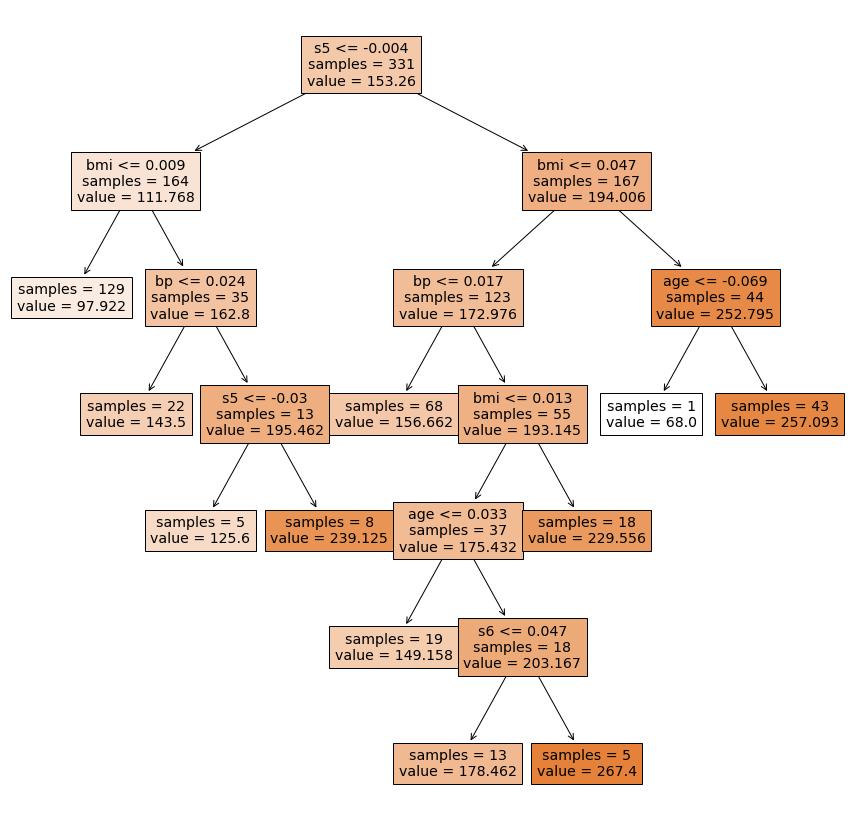

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(15, 15))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = X.columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

## PREDICCION Y EVALUACION DE LOS MODELOS


In [ ]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
print(" PREDICCIONES TUTO")
predicciones_tuto = modelo_tutorial.predict(X = X_test)

squared_error_tuto = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_tuto,
        squared = False
       )
print(f"El error (squared_error) de test es: {squared_error_tuto}")

print(" PREDICCIONES PARAM1 ")

predicciones_param1 = modelo_param1.predict(X = X_test)

squared_error_param1 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_param1,
        squared = False
       )
print(f"El error (squared_error) de test es: {squared_error_param1}")

print(" PREDICCIONES FINAL RARI ")

predicciones_final = modelo_final.predict(X = X_test)

squared_error_final = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_final,
        squared = False
       )
print(f"El error (squared_error) de test es: {squared_error_final}")


 PREDICCIONES TUTO
El error (squared_error) de test es: 65.15116594887334
 PREDICCIONES PARAM1 
El error (squared_error) de test es: 59.25922514225752
 PREDICCIONES FINAL RARI 
El error (squared_error) de test es: 63.626739411902186


 MODELO PARAM1 
Profundidad del árbol: 3
Número de nodos terminales: 6


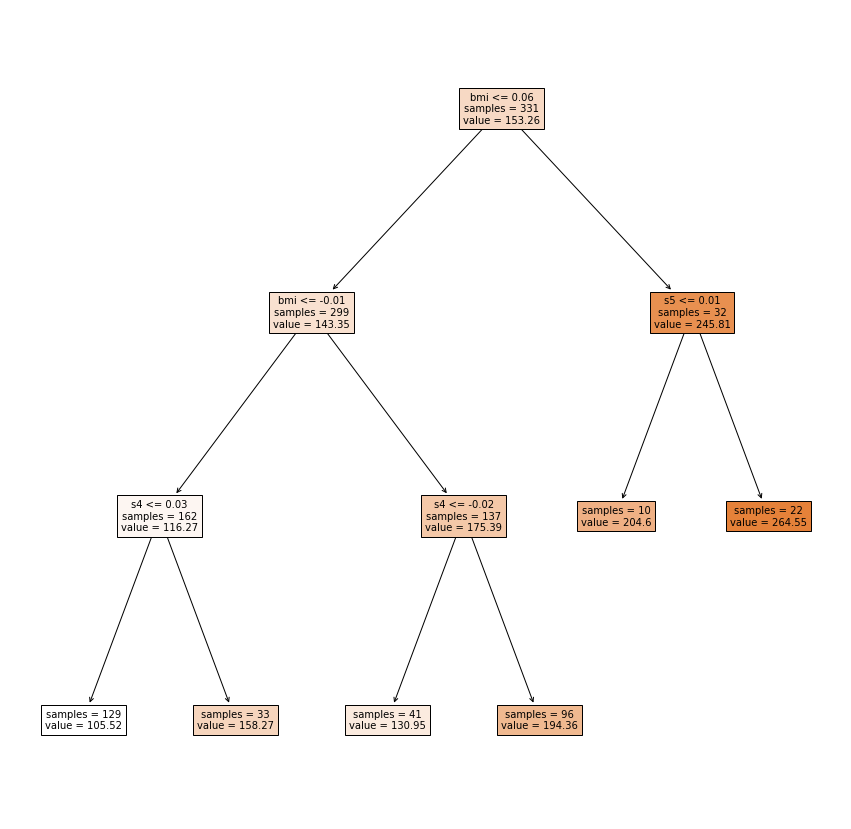

In [ ]:
# ------------------------------------------------------------------------------
print(" MODELO PARAM1 ")
fig, ax = plt.subplots(figsize=(15, 15))

print(f"Profundidad del árbol: {modelo_param1.get_depth()}")
print(f"Número de nodos terminales: {modelo_param1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_param1,
            feature_names = X.columns,
            class_names   = 'TARGET',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

CONCLUSION:
Los modelos de Arbol de desicion no explican la mayoria de lso casos ya que el error es de 59.3 puntos por arriba o por abajo de la prediccion.
Estimo que el problema se da en que hay que eliminar columnas correlacionales del set de datos y tambien creo que si ampleamos la profundidad mejorariamos la presicion para un arbol de regresion.

#CONCLUSION: COMPARACION DE MODELOS

Ambos modelos empleados arrojan valores de prediccion muy bajos y errores altos. Esto puede deberse, entre otros factores, a que el set de datos no presenta una distribucion Normal. 
Una solucion seria analizar columna con columna para ver la mejor relacion entre ellas y trabajar con aquellas que aporten mas informacion. 
Por lo pronto lo ideal seria seguir buscando formas de mejorar ambos modelos o entender hasta cuando el modelo explica lo mas que pudo y de alli ya no hay nada mas que se pueda hacer.

# MODELO Nu Support Vector Regression.
Utilizaremos un modelo NuSVR para regresion y evaluaremos si este modelo se adapta mejor al set de datos.

Nu Regresión de vectores de soporte.

Similar a NuSVC, para la regresión, usa un parámetro nu para controlar la cantidad de vectores de soporte. Sin embargo, a diferencia de NuSVC, donde nu reemplaza a C, aquí nu reemplaza el parámetro epsilon de epsilon-SVR.

La implementación se basa en libsvm.

Lea más en la Guía del usuario .

SVM



https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR

In [30]:
# DEPENDENCIAS
# ==============================================================================
# Authors: Eustache Diemert <eustache@diemert.fr>
#          Maria Telenczuk <https://github.com/maikia>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: BSD 3 clause

import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import NuSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hamming_loss

# Initialize random generator
np.random.seed(0)

## Cargar los datos
 Primero cargamos ambos conjuntos de datos.
 * **Nota: Estamos usando fetch_20newsgroups_vectorizedpara descargar 20 conjuntos de datos de grupos de noticias. Devuelve características listas para usar.**
 * **Nota: X del conjunto de datos de 20 grupos de noticias es una matriz dispersa, mientras que el X conjunto de datos de diabetes es una matriz numpy.**


In [40]:
# Datos
# ==============================================================================
# FUNCION PARA GENERAR DATOS
def generate_data(case):
    """Generate regression/classification data."""
    if case == "regression":
        X, y = datasets.load_diabetes(return_X_y=True)
        train_size = 0.8
    elif case == "classification":
        X, y = datasets.fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
        train_size = 0.4  # to make the example run faster

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=0
    )

    data = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
    return data


regression_data = generate_data("regression")
classification_data = generate_data("classification")

## Influencia de referencia 
A continuación, podemos calcular la influencia de los parámetros en el estimador dado. 
En cada ronda, configuraremos el estimador con el nuevo valor de **changing_param** y recopilaremos los tiempos de predicción, el rendimiento de la predicción y las complejidades para ver cómo esos cambios afectan al estimador. Calcularemos la complejidad utilizando complexity_computerpass como parámetro.

In [37]:
def benchmark_influence(conf):
    """
    Benchmark influence of `changing_param` on both MSE and latency.
    """
    prediction_times = []
    prediction_powers = []
    complexities = []
    for param_value in conf["changing_param_values"]:
        conf["tuned_params"][conf["changing_param"]] = param_value
        estimator = conf["estimator"](**conf["tuned_params"])

        print("Benchmarking %s" % estimator)
        estimator.fit(conf["data"]["X_train"], conf["data"]["y_train"])
        conf["postfit_hook"](estimator)
        complexity = conf["complexity_computer"](estimator)
        complexities.append(complexity)
        start_time = time.time()
        for _ in range(conf["n_samples"]):
            y_pred = estimator.predict(conf["data"]["X_test"])
        elapsed_time = (time.time() - start_time) / float(conf["n_samples"])
        prediction_times.append(elapsed_time)
        pred_score = conf["prediction_performance_computer"](
            conf["data"]["y_test"], y_pred
        )
        prediction_powers.append(pred_score)
        print(
            "Complexity: %d | %s: %.4f | Pred. Time: %fs\n"
            % (
                complexity,
                conf["prediction_performance_label"],
                pred_score,
                elapsed_time,
            )
        )
    return prediction_powers, prediction_times, complexities

## Elegir parámetros
Elegimos los parámetros para cada uno de nuestros estimadores haciendo un diccionario con todos los valores necesarios. **changing_param** es el nombre del parámetro que variará en cada estimador. 
La complejidad será definida por **complexity_label** y calculada usando **complexity_computer**. También tenga en cuenta que, según el tipo de estimador, estamos pasando datos diferentes.

In [35]:
def _count_nonzero_coefficients(estimator):
    a = estimator.coef_.toarray()
    return np.count_nonzero(a)

# CONFIGURACIONES
configurations = [
    {
        "estimator": SGDClassifier,
        "tuned_params": {
            "penalty": "elasticnet",
            "alpha": 0.001,
            "loss": "modified_huber",
            "fit_intercept": True,
            "tol": 1e-1,
            "n_iter_no_change": 2,
        },
        "changing_param": "l1_ratio",
        "changing_param_values": [0.25, 0.5, 0.75, 0.9],
        "complexity_label": "non_zero coefficients",
        "complexity_computer": _count_nonzero_coefficients,
        "prediction_performance_computer": hamming_loss,
        "prediction_performance_label": "Hamming Loss (Misclassification Ratio)",
        "postfit_hook": lambda x: x.sparsify(),
        "data": classification_data,
        "n_samples": 5,
    },
    {
        "estimator": NuSVR,
        "tuned_params": {"C": 1e3, "gamma": 2**-15},
        "changing_param": "nu",
        "changing_param_values": [0.05, 0.1, 0.2, 0.35, 0.5],
        "complexity_label": "n_support_vectors",
        "complexity_computer": lambda x: len(x.support_vectors_),
        "data": regression_data,
        "postfit_hook": lambda x: x,
        "prediction_performance_computer": mean_squared_error,
        "prediction_performance_label": "MSE",
        "n_samples": 15,
    },
    {
        "estimator": GradientBoostingRegressor,
        "tuned_params": {
            "loss": "squared_error",
            "learning_rate": 0.05,
            "max_depth": 2,
        },
        "changing_param": "n_estimators",
        "changing_param_values": [10, 25, 50, 75, 100],
        "complexity_label": "n_trees",
        "complexity_computer": lambda x: x.n_estimators,
        "data": regression_data,
        "postfit_hook": lambda x: x,
        "prediction_performance_computer": mean_squared_error,
        "prediction_performance_label": "MSE",
        "n_samples": 15,
    },
]

## Ejecute el código y grafique los resultados

Definimos todas las funciones necesarias para ejecutar nuestro **benchmark**.

Ahora, recorreremos las diferentes **configuraciones** (**configurations**) que definimos previamente. 

Posteriormente, podemos analizar las parcelas obtenidas del **benchmark**:

**Relaxing the L1** La penalización en **el clasificador SGD reduce el error de predicción pero conduce a un aumento en el tiempo de entrenamiento**. 
Podemos hacer un análisis similar con respecto al **tiempo de entrenamiento que aumenta con el número de vectores de soporte con un Nu-SVR**. 

Sin embargo, observamos que **existe un número óptimo de vectores de soporte que reduce el error de predicción**. De hecho, muy p**ocos vectores de soporte conducen a un modelo infraajustado**, mientras que **demasiados vectores de soporte conducen a un modelo sobreajustado**. 

Se puede sacar exactamente l**a misma conclusión para el modelo de aumento de gradiente**. 

### **La única diferencia con el Nu-SVR es que tener demasiados árboles en el conjunto no es tan perjudicial.**

In [53]:
# FUNCION QUE GRAFICA LA INFLUENCIA

def plot_influence(conf, mse_values, prediction_times, complexities):
    """
    Plot influence of model complexity on both accuracy and latency.
    """

    fig = plt.figure()
    fig.subplots_adjust(right=0.75)

    # first axes (prediction error)
    ax1 = fig.add_subplot(111)
    line1 = ax1.plot(complexities, mse_values, c="tab:blue", ls="-")[0]
    ax1.set_xlabel("Model Complexity (%s)" % conf["complexity_label"])
    y1_label = conf["prediction_performance_label"]
    ax1.set_ylabel(y1_label)

    ax1.spines["left"].set_color(line1.get_color())
    ax1.yaxis.label.set_color(line1.get_color())
    ax1.tick_params(axis="y", colors=line1.get_color())

    # second axes (latency)
    ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
    line2 = ax2.plot(complexities, prediction_times, c="tab:orange", ls="-")[0]
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    y2_label = "Time (s)"
    ax2.set_ylabel(y2_label)
    ax1.spines["right"].set_color(line2.get_color())
    ax2.yaxis.label.set_color(line2.get_color())
    ax2.tick_params(axis="y", colors=line2.get_color())

    plt.legend(
        (line1, line2), ("prediction error", "prediction latency"), loc="upper right"
    )

    plt.title(
        "Influence of varying '%s' on %s"
        % (conf["changing_param"], conf["estimator"].__name__)
    )


Benchmarking SGDClassifier(alpha=0.001, l1_ratio=0.25, loss='modified_huber',
              n_iter_no_change=2, penalty='elasticnet', tol=0.1)
Complexity: 4940 | Hamming Loss (Misclassification Ratio): 0.2641 | Pred. Time: 0.079924s

Benchmarking SGDClassifier(alpha=0.001, l1_ratio=0.5, loss='modified_huber',
              n_iter_no_change=2, penalty='elasticnet', tol=0.1)
Complexity: 1801 | Hamming Loss (Misclassification Ratio): 0.3131 | Pred. Time: 0.072421s

Benchmarking SGDClassifier(alpha=0.001, l1_ratio=0.75, loss='modified_huber',
              n_iter_no_change=2, penalty='elasticnet', tol=0.1)
Complexity: 1015 | Hamming Loss (Misclassification Ratio): 0.3349 | Pred. Time: 0.051528s

Benchmarking SGDClassifier(alpha=0.001, l1_ratio=0.9, loss='modified_huber',
              n_iter_no_change=2, penalty='elasticnet', tol=0.1)
Complexity: 791 | Hamming Loss (Misclassification Ratio): 0.3342 | Pred. Time: 0.044013s

Benchmarking NuSVR(C=1000.0, gamma=3.0517578125e-05, nu=0.05)
Compl

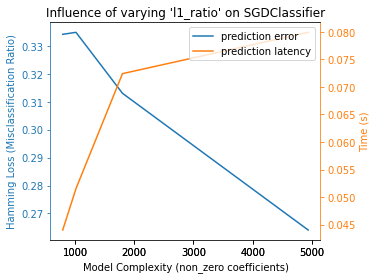

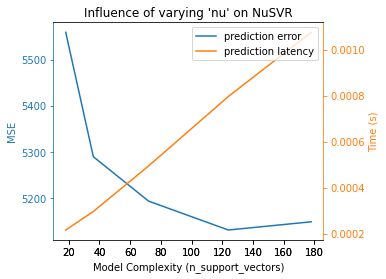

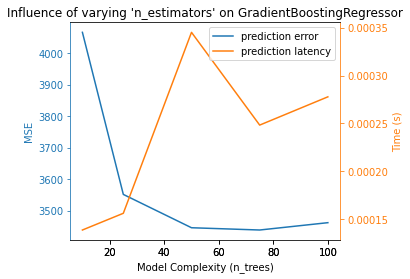

In [54]:
# GREAFICO
for conf in configurations:
    prediction_performances, prediction_times, complexities = benchmark_influence(conf)
    plot_influence(conf, prediction_performances, prediction_times, complexities)
plt.show()

## CREANDO EL MODELO

In [79]:
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
# n_samples, n_features = 10, 5
# np.random.seed(0)
# y = np.random.randn(n_samples)
# X = np.random.randn(n_samples, n_features)
model_NuSVR = make_pipeline(StandardScaler(), NuSVR(C=1.0, nu=0.1))
model_NuSVR_param1 = make_pipeline(StandardScaler(), NuSVR(C=1000.0, gamma=3.0517578125e-05, nu=0.35))


In [80]:
# DIVIDO OBTENGO LOS DATOS
X_train = regression_data['X_train']
y_train = regression_data['y_train'] 
X_test = regression_data['X_test']
y_test = regression_data['y_test'] 

In [81]:
# ENTRENAMIENTO
model_NuSVR.fit(X_train,y_train)
model_NuSVR_param1.fit(X_train,y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('nusvr', NuSVR(C=1000.0, gamma=3.0517578125e-05, nu=0.35))])

In [82]:
# PREDICCION
predict_model_NuSVR = model_NuSVR.predict(X_test)
predict_model_NuSVR_param1 = model_NuSVR_param1.predict(X_test)

In [83]:
print(type(predict_model_NuSVR))
print(type(predict_model_NuSVR_param1))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [64]:
predict_model_NuSVR

array([172.45119016, 172.23553481, 168.11656744, 164.02509003,
       166.94619954, 171.85822003, 162.95055575, 171.45463541,
       165.39978953, 169.50185626, 166.53208805, 170.95786324,
       164.11514354, 163.52395636, 173.93064673, 162.57797025,
       164.69990827, 163.02209965, 164.61585255, 171.71510009,
       167.42983362, 164.83172146, 168.092452  , 165.04721204,
       169.66099597, 168.50482851, 167.20063803, 162.72192732,
       167.45395843, 169.39560498, 170.16808645, 161.17818983,
       163.5638617 , 167.78746517, 168.80987996, 169.27227471,
       168.28701561, 169.78605492, 165.0252604 , 171.02461862,
       163.96939887, 169.51949132, 168.08053838, 167.21378818,
       170.91251311, 163.44202411, 165.97794704, 165.30589509,
       167.189996  , 171.2473545 , 166.82748058, 161.69665995,
       166.72402552, 168.81540311, 170.99369453, 169.26569217,
       170.09323518, 162.96724735, 168.91481905, 170.20859268,
       168.74279556, 165.04756577, 168.67123023, 166.62

## EVALUANDO EL MODELO

In [86]:
score = model_NuSVR.score(X_train, y_train)
print("R-squaered: model_NuSVR ", score)


R-squaered: model_NuSVR  0.014278118961181252


In [89]:
score = model_NuSVR_param1.score(X_train, y_train)
print("R-squaered: model_NuSVR_param1 ", score)

R-squaered: model_NuSVR_param1  0.2514090751815019


MSE:  5055.465704023851
RMSE:  2527.7328520119254
-------------------------------------------
MSE_param:  4092.758225633343
RMSE_param:  2046.3791128166715
-------------------------------------------
--------- model_NuSVR -----------


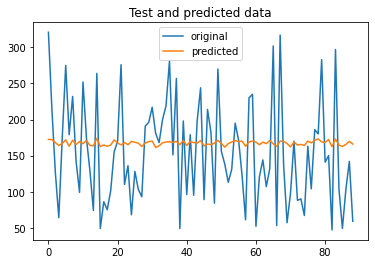

--------- model_NuSVR param1  -----------


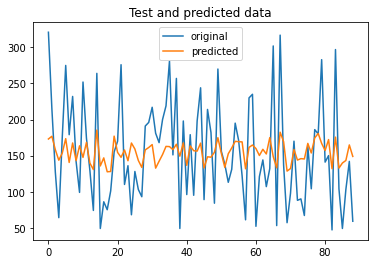

In [90]:
# EVALUAMOS EL ERROR CUADRATICO MEDIO
mse_SVR = mean_squared_error(y_test, predict_model_NuSVR)

mse_SVR_param = mean_squared_error(y_test, predict_model_NuSVR_param1)


print("MSE: ", mse_SVR)
print("RMSE: ", mse_SVR*(1/2.0))
print("-------------------------------------------")
print("MSE_param: ", mse_SVR_param)
print("RMSE_param: ", mse_SVR_param*(1/2.0))

print("-------------------------------------------")

# Finally, we'll visualize the original and predicted data in a plot.
print("--------- model_NuSVR -----------")
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict_model_NuSVR, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

print("--------- model_NuSVR param1  -----------")
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict_model_NuSVR_param1, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()



In [95]:
# ESCALO LAS MATRICES X e Y

from sklearn.preprocessing import scale
X_train_scaler = scale(X_train)
y_train_scaler = scale(y_train)
X_test_scaler = scale(X_test)
y_test_scaler = scale(y_test)


In [96]:
print(X_train_scaler.shape, "\n", y_train_scaler.shape)

(353, 10) 
 (353,)


In [94]:
X_train

array([[ 0.24396182,  1.02582922,  0.06364526, ..., -0.83072415,
         0.07515871,  1.49297091],
       [-2.23157066, -0.97482113, -1.56789685, ..., -1.59866429,
        -0.86974251, -0.10202047],
       [ 0.54402637,  1.02582922, -0.70803006, ..., -0.062784  ,
        -0.30595955, -1.02543653],
       ...,
       [ 1.21917159, -0.97482113, -0.4214078 , ...,  1.47309629,
         1.61466743,  2.75217463],
       [-1.63144158, -0.97482113, -1.47970538, ..., -0.83072415,
        -0.37050867, -1.69701185],
       [ 0.84409091,  1.02582922,  1.4747087 , ...,  0.70515614,
         1.49807525,  1.74481165]])

In [103]:
# Defino un nuevo modelo
model_NuSVR_param2 = make_pipeline(StandardScaler(), NuSVR(C=1000.0, gamma=3.0517578125e-05, nu=0.35))
# Entreno con el set de datos escalado
model_NuSVR_param2.fit(X_train_scaler,y_train_scaler)
# Prediccion con matriz escalada
predic_model_NuSVR_param2 = model_NuSVR_param2.predict(X_test_scaler)


In [99]:
score = model_NuSVR.score(X_train_scaler, y_train_scaler)
print("R-squaered:", score)

R-squaered: -28317.06874557212


## Voy a escalar Y ya que X esta escalado al momento entrenar

Vuelvo a graficar para verificar si mejora la presicion

MSE:  5055.465704023851
RMSE:  2527.7328520119254
-------------------------------------------
--------- model_NuSVR Escalar -----------


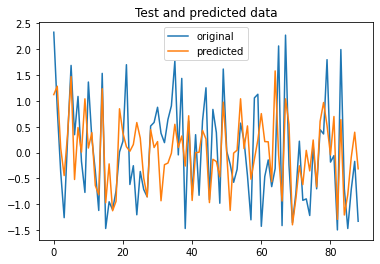

In [105]:
mse_SVR_param = mean_squared_error(y_test_scaler, predic_model_NuSVR_param2)


print("MSE: ", mse_SVR)
print("RMSE: ", mse_SVR*(1/2.0))
print("-------------------------------------------")
# Finally, we'll visualize the original and predicted data in a plot.
print("--------- model_NuSVR Escalar -----------")
x_ax = range(len(y_test_scaler))
plt.plot(x_ax, y_test_scaler, label="original")
plt.plot(x_ax, predic_model_NuSVR_param2, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

# MODELO Random Forest REGRESION
https://www.cienciadedatos.net/documentos/py08_random_forest_python.html

In [108]:
# LIBRERIAS Y DEPENDENCIAS
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

## DATOS

In [117]:
# Se unen todos los datos (predictores y variable respuesta en un único dataframe)
data = load_diabetes()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
data['target'].unique()

# SEPARO ENTRE VARIABLES PREDICTORAS Y TARGET
X = data.drop(columns = 'target')
y = data['target']
print(X.head())
print(y.head())
print('----------------------------------------------------------')
print('-        X info                                    -------')
print(X.info())
print('-        y info                                    -------')
y

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
----------------------------------------------------------
-        X info                                    -------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
-

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Ajuste del modelo

FUNDAMENTAL DEL MODELO
Se ajusta un modelo empleando como variable respuesta TARGUET y como predictores todas las otras variables disponibles.

La clase RandomForestRegressor del módulo sklearn.ensemble permite entrenar modelos random forest para problemas de regresión. Los parámetros e hiperparámetros empleados por defecto son:


De entre todos ellos, **destacan aquellos que detienen el crecimiento de los árboles, los que controlan el número de árboles y predictores incluidos, y los que gestionan la paralelización**:

**n_estimators**; número de árboles incluidos en el modelo.

**max_depth**: profundidad máxima que pueden alcanzar los árboles.

**min_samples_split**: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

**min_samples_leaf**: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).

**max_leaf_nodes**: número máximo de nodos terminales que pueden tener los árboles.

**max_features**: número de predictores considerados a en cada división. Puede ser:

* Un valor entero
* Una fracción del total de predictores.
* “auto”, utiliza todos los predictores.
* “sqrt”, raiz cuadrada del número total de predictores.
* “log2”, log2 del número total de predictores. 
* None, utiliza todos los predictores.

**oob_score**: Si se calcula o no el out-of-bag R^2. Por defecto es False ya que aumenta el tiempo de entrenamiento.

**n_jobs**: número de cores empleados para el entrenamiento. En random forest los árboles se ajustan de forma independiente, por lo la paralelización reduce notablemente el tiempo de entrenamiento. Con -1 se utilizan todos los cores disponibles.

**random_state**: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.


**Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones**. 

Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

## SPLIT DE DATOS

In [118]:
# División de los datos en train y test
# ==============================================================================
# DIVISION ENTRE: TRAIN Y TEST

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## CREACION DEL MODELO

In [119]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 100, #El número de árboles en el bosque.
            criterion    = 'squared_error', # La función para medir la calidad de una división. 
            max_depth    = None, # profundidad maxima del arbol
            min_samples_leaf = 5, # numero minimo de lecturas por nodo
            max_features = 'auto', # todos los predictores
            oob_score    = False, # Ya sea para usar muestras listas para usar para estimar la puntuación de generalización. Solo disponible si bootstrap=True.
            n_jobs       = -1, # El número de trabajos a ejecutar en paralelo. fit, predict, decision_pathy applyestán todos paralelizados sobre los árboles. Nonesignifica 1 a menos que esté en un joblib.parallel_backend contexto. -1significa usar todos los procesadores. 
            random_state = 123
         )



## ENTRENAMIENTO

In [120]:
# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, n_jobs=-1, random_state=123)

## Predicción y evaluación del modelo

In [121]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 55.463079476469765


El error cuadratico medio es elevado. 

## Optimización de hiperparámetros

El modelo inicial se ha entrenado utilizando 10 árboles (**n_estimators=100**) y manteniendo el resto de hiperparámetros con su valor por defecto. Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.

Los modelos Random Forest tienen la ventaja de disponer del **Out-of-Bag error**, lo que permite obtener una estimación del error de test sin recurrir a la validación cruzada, que es computacionalmente costosa. 

En la implementación de **RandomForestRegressor**, la métrica devuelta como **oob_score es el  R2** , si se desea otra, se tiene que recurrir al método **oob_decision_function_()** para obtener las predicciones y con ellas calcular la métrica de interés. Para una explicación más detallada consultar: Grid search de modelos Random Forest con **out-of-bag error** y **early stopping**.

Cabe tener en cuenta que, **cuando se busca el valor óptimo de un hiperparámetro con dos métricas distintas, el resultado obtenido raramente es el mismo. Lo importante es que ambas métricas identifiquen las mismas regiones de interés.**

### Número de árboles

En Random Forest,** el número de árboles no es un hiperparámetro crítico** en cuanto que, **añadir árboles, solo puede hacer que mejorar el resultado**. En **Random Forest no se produce overfitting por exceso de árboles**. Sin embargo, **añadir árboles una vez que la mejora se estabiliza es una perdida te recursos computacionales**.

### Validación empleando el Out-of-Bag error

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Valor óptimo de n_estimators: 146


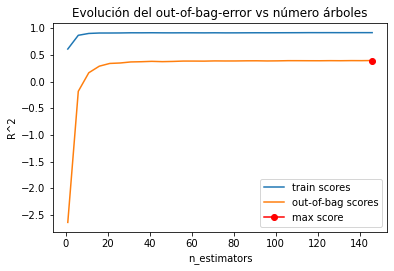

In [122]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error', # La función para medir la calidad de una división. 
                max_depth    = None, # profundidad maxima del arbol
                # min_samples_leaf = 5, # numero minimo de lecturas por nodo
                max_features = 'auto', # todos los predictores
                oob_score    = True, # Ya sea para usar muestras listas para usar para estimar la puntuación de generalización. Solo disponible si bootstrap=True.
                n_jobs       = -1, # El número de trabajos a ejecutar en paralelo. fit, predict, decision_pathy applyestán todos paralelizados sobre los árboles. Nonesignifica 1 a menos que esté en un joblib.parallel_backend contexto. -1significa usar todos los procesadores. 
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

El valor optimo arrojado por el script es **n_estimators: 146** 

### Validación empleando k-cross-validation y neg_root_mean_squared_error



Valor óptimo de n_estimators: 56


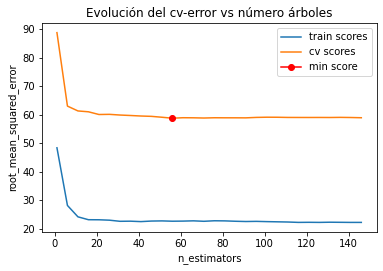

In [124]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

El valor optimo arrojado por el script es **n_estimators: 56** 

Las metricas son muy dispares ya que **Out-of-Bag error** optimiza en 146 arboles
Mientras que **k-cross-validation y neg_root_mean_squared_error** optimiza en 56 arboles
